In [1]:
!pip install tabulate
!pip install descartes
!pip install linearmodels
!pip install stargazer
!pip install Pandoc
!pip install nbconvert[webpdf]


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
from linearmodels.iv import IV2SLS
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML
from IPython.display import HTML, display


In [21]:
# Load the Yelp business dataset
Final_regression_merged = pd.read_csv("final_regression_merged.csv")
Final_regression_merged = Final_regression_merged[Final_regression_merged['state_category'] == 'AZ']
Final_regression_merged = Final_regression_merged.drop(columns=['level_1'])
Final_regression_merged = Final_regression_merged.drop_duplicates()
Final_regression_merged = Final_regression_merged.reset_index(drop=True)

# Project Three

## OLS Regression

The relationship between the four variables I mentioned before (population density, household income, age, sex ratio) and whether or not a restaurant provides food delivery services with Yelp restaurant ratings is likely to be complex and may not be strictly linear. I will break down each variable and its potential relationship then do the regression :

1. **Population Density**: Population density could have a non-linear relationship with Yelp restaurant ratings. Initially, as population density increases, there might be more potential customers for restaurants, which could lead to higher ratings due to increased demand and competition the relationship should be linear before this point. However, there could be a point of saturation where high population density leads to more intense competition and potentially lower ratings due to higher expectations from customers. Thus the regression tree could be applied to this variable.

2. **Household Income**: Household income could have a linear relationship with Yelp ratings. As household income rises, restaurants in areas with higher income levels are more likely to receive elevated Yelp ratings. This phenomenon can be attributed to the increased ability of individuals with higher incomes to afford dining at upscale establishments, leading to higher expectations and greater appreciation for quality. These customers' frequent dining experiences and exposure to diverse culinary offerings could contribute to a more discerning evaluation of restaurant experiences, thus positively influencing ratings. Moreover, restaurants in such neighborhoods might invest more in exceptional service, ambiance, and culinary innovation, all of which contribute to a superior dining experience and, consequently, higher Yelp ratings.

3. **Age and Sex Ratio**: These demographic variables are likely to have non-linear relationships with Yelp ratings. The non-linear relationship between the percentage of people aged 15 to 24 and Yelp ratings acknowledges that dining preferences and expectations can vary significantly across different age groups. Restaurants situated in areas with a higher percentage of younger individuals might experience non-linear shifts in ratings. For instance, a greater concentration of young adults could lead to both higher and lower ratings, as this demographic tends to seek diverse and often trend-driven dining experiences, affecting their feedback in non-linear ways. Similarly, the male-to-female ratio's non-linear influence on Yelp ratings underscores the intricate interplay between gender dynamics and dining habits. While the direction of the relationship might not be immediately apparent, it reflects the complexity of how gender-specific preferences and cultural norms intersect with restaurant experiences. A significantly skewed ratio might lead to distinct patterns in customer behavior, impacting ratings in non-linear ways due to the differing expectations, preferences, and social dynamics among various gender compositions. Cultural and generational differences further contribute to the non-linear relationship between age, sex ratio, and Yelp ratings. Factors such as cultural background, lifestyle, and societal norms can lead to nuanced shifts in dining choices and satisfaction thresholds. 

4. **Food Delivery Services**: The relationship between providing food delivery services and Yelp ratings could also be linear. Offering food delivery can attract a broader customer base and potentially lead to higher ratings due to convenience.

In practical implementation, data analysis is paramount to discerning the precise nuances of these relationships. I've strategized to employ techniques, including regression analysis and machine learning, to comprehensively evaluate the intricate connections between the variables and their influence on Yelp ratings. Beyond simple linear associations, I intend to delve into interaction effects, recognizing that the impact of one variable can be contingent on the values of another. In order to answer the research question, I will first focus on the dynamics of the interaction between population density and food delivery services.

In [4]:
models = []
Final_regression_merged['interaction'] = Final_regression_merged['population_density'] * Final_regression_merged['has_food_delivery']

In [5]:
# 1. Stars ～ Population density + Food delivery  Final_regression
X = Final_regression_merged[['population_density', 'has_food_delivery']]
y = Final_regression_merged['stars']
X = sm.add_constant(X)
model1 = sm.OLS(y, X).fit()
models.append(model1)

# 2. Stars ～ Population density * Food delivery + Population density + Food delivery
X = Final_regression_merged[['population_density', 'has_food_delivery', 'interaction']]
y = Final_regression_merged['stars']
X = sm.add_constant(X)
model2 = sm.OLS(y, X).fit()
models.append(model2)

# 3. Stars ～ Population density * Food delivery + Population density + Food delivery + Income + Count 
X = Final_regression_merged[['population_density', 'has_food_delivery', 'interaction', 'Mean_Income', 'count']]
y = Final_regression_merged['stars']
X = sm.add_constant(X)
model3 = sm.OLS(y, X).fit()
models.append(model3)

# 3b. Stars ～ Population density + Food delivery + Income + Count 
X = Final_regression_merged[['population_density', 'has_food_delivery', 'Mean_Income', 'count']]
y = Final_regression_merged['stars']
X = sm.add_constant(X)
model3b = sm.OLS(y, X).fit()
models.append(model3b)

# 4. Stars ～ Population density * Food delivery + Population density + Food delivery + Income + Age + Sex
X = Final_regression_merged[['population_density', 'has_food_delivery', 'interaction', 'Mean_Income', 'Pop_15_24', 'Sex_ratio']]
y = Final_regression_merged['stars']
X = sm.add_constant(X)
model4 = sm.OLS(y, X).fit()
models.append(model4)

# 4b. Stars ～ Population density + Food delivery + Income + Age + Sex
X = Final_regression_merged[['population_density', 'has_food_delivery', 'Mean_Income', 'Pop_15_24', 'Sex_ratio']]
y = Final_regression_merged['stars']
X = sm.add_constant(X)
model4b = sm.OLS(y, X).fit()
models.append(model4b)

# 5. Stars ～ Population density * Food delivery + Population density + Food delivery + Income + Age + Sex + Count
X = Final_regression_merged[['population_density', 'has_food_delivery', 'interaction', 'Mean_Income', 'Pop_15_24', 'Sex_ratio', 'count']]
y = Final_regression_merged['stars']
X = sm.add_constant(X)
model5 = sm.OLS(y, X).fit()
models.append(model5)

# 5b. Stars ～ Population density + Food delivery + Income + Age + Sex + Count
X = Final_regression_merged[['population_density', 'has_food_delivery', 'Mean_Income', 'Pop_15_24', 'Sex_ratio', 'count']]
y = Final_regression_merged['stars']
X = sm.add_constant(X)
model5b = sm.OLS(y, X).fit()
models.append(model5b)

# 6. Stars ～ Population density * Food delivery + Population density + Food delivery + Income + Age + Sex + Count + percentage_delivery
X = Final_regression_merged[['population_density', 'has_food_delivery', 'interaction', 'Mean_Income', 'Pop_15_24', 'Sex_ratio', 'count', 'percentage_delivery']]
y = Final_regression_merged['stars']
X = sm.add_constant(X)
model6 = sm.OLS(y, X).fit()
models.append(model6)

# 6b. Stars ～ Population density + Food delivery + Income + Age + Sex + Count + percentage_delivery
X = Final_regression_merged[['population_density', 'has_food_delivery', 'Mean_Income', 'Pop_15_24', 'Sex_ratio', 'count', 'percentage_delivery']]
y = Final_regression_merged['stars']
X = sm.add_constant(X)
model6b = sm.OLS(y, X).fit()
models.append(model6b)

The regression models I've chosen to run reflect a thoughtful approach to understanding the economic factors that potentially influence restaurant ratings. Each model builds upon the previous one, gradually incorporating additional independent variables. Here's the economic reasoning behind running each of these regressions:

1. **Stars ~ Population Density + Food Delivery**:
   - This initial regression investigates the impact of two fundamental factors - population density and the presence of food delivery services - on restaurant ratings. Population density can reflect market competition, while the availability of food delivery services can affect convenience for customers. By isolating these two variables, you gain insight into their individual contributions to restaurant ratings.

2. **Stars ~ Population Density + Food Delivery + Income + Count**:
   - Adding income and count variables introduces economic capacity and market size considerations. Income levels can reflect the average spending power of residents in an area, influencing the type of restaurants and their quality. Count, which might represent the number of restaurants in an area, can indicate competition levels. Including these variables allows me to explore how economic factors and market size relate to restaurant ratings alongside population density and food delivery.

3. **Stars ~ Population Density + Food Delivery + Income + Age + Sex**:
   - Incorporating age and sex variables recognizes the influence of demographic factors on dining preferences and expectations. Different percentage of age groups and genders might have varying dining habits and satisfaction thresholds, impacting restaurant ratings. This model delves deeper into the social and demographic aspects of restaurant choice and rating behaviors.

4. **Stars ~ Population Density + Food Delivery + Income + Age + Sex + Count**:
   - This regression includes all the listed variables from model 3 and the 'count' variable from Model 3. Comparing with model4, this 'count' variable adds another layer of competition to the analysis. More restaurants can lead to intensified competition, potentially affecting the quality and ratings of individual establishments. This comprehensive model accounts for various economic, demographic, and market factors simultaneously.
   
5. **Stars ~ Population Density + Food Delivery + Income + Age + Sex + Count + Percentage of delivery**:
   - The final regression includes all the listed variables from model 4 and the 'percentage_delivery' variable. Which is the varaible that shows the percentage of restaurants that provide the food delivery service among all the Yelp restaurant in a Zip code area.
   
In summary, each regression model builds upon the previous one by incorporating additional economic and demographic variables to provide a more comprehensive understanding of the factors influencing restaurant ratings on Yelp. The goal is to uncover the complex interplay between these factors and their collective impact on restaurant performance.

In [6]:
stargazer1 = Stargazer([model1, model3b, model4b, model5b, model6b])
model_names = ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5']
stargazer1.custom_columns(model_names)
stargazer1.show_model_numbers(False)
HTML(stargazer1.render_html())

In the second table, I introduces an interaction term (Population Density * Food Delivery) to assess whether the joint effect of population density and food delivery is different from their individual effects. It recognizes that these two variables might not have a simple additive relationship. For example, in highly dense areas, the presence of food delivery might have a more significant impact than in less dense areas due to increased competition.

1b. **Stars ~ Population Density \* Food Delivery + Population Density + Food Delivery**



2b. **Stars ~ Population Density \* Food Delivery + Population Density + Food Delivery + Income + Count**



3b. **Stars ~ Population Density \* Food Delivery + Population Density + Food Delivery + Income + Age + Sex**



4b. **Stars ~ Population Density \* Food Delivery + Population Density + Food Delivery + Income + Age + Sex + Count**



5b. **Stars ~ Population Density \* Food Delivery + Population Density + Food Delivery + Income + Age + Sex + Count + Percentage of delivery**


In [7]:
stargazer2 = Stargazer([model2, model3,model4, model5, model6])
model_names = ['Model 1b', 'Model 2b', 'Model 3b', 'Model 4b', 'Model 5b']
stargazer2.custom_columns(model_names)
stargazer2.show_model_numbers(False)
HTML(stargazer2.render_html())

After investigating the result, I will choose the Model 2 in Table 1 as my preferred regression, by listing several advantages of this model compared to the other four models:

$$
\text{Stars} = \beta_0 + 
\beta_1 \text{population_density} +
\beta_2 \text{has_food_delivery} + 
\beta_3 \text{Mean_Income} +
\beta_4 \text{count} +
\epsilon
$$


**Advantages of Model 2**:

1. **Economic Interpretability**: 
    - In addition to Model 1, Model 2 includes the key economic indicator "Mean Income" and the number of restaurants ("count"). These variables are often directly linked to consumer behaviour and market dynamics. "Mean Income" reflects the economic capacity of the local population, while "count" represents the level of competition in the area. These factors have straightforward economic interpretations that align well with the context of the restaurant industry.

2. **Simplicity and Relevance**: 
    - Model 2 strikes a balance between complexity and relevance. It includes important economic indicators and restaurant count without adding too many other variables. This simplicity makes the model more interpretable and easier to communicate to restaurant owners/investors. Also, these variables are easy to understand and apply in real-world scenarios. The results from Model 2 can be practically useful for restaurant owners and policymakers seeking insights into factors that influence restaurant ratings.

3. **High R-squared**: 
    - Model 2 has a relatively high adjusted R-squared among these models, indicating that it explains a greater proportion of the variance in "stars." This suggests that the inclusion of "Mean Income" and "count" contributes to a better fit of the model to the data, compared with Model 1.

4. **Statistical Significance**: 
    - In Model 2, all variables exhibit statistically significant coefficients, barring the interaction term. This underscores their substantial contributions in elucidating the fluctuations in restaurant ratings. Significantly, Model 2 is the only model having the "population density" variable as significant among all five regression models, which holds pivotal importance as the cornerstone of my research question. 


As I mentioned in the "Advantages of Model 2" section, there are several measures that can be used to assess the performance of the regressions. For instance the R-squared, Adjusted R-squared, Residual Standard Error (RSE), F-statistic, the statistical significance (p-value) and the Mean Squared Error (MSE):

1. **R-squared (Coefficient of Determination)**:
   R-squared measures the proportion of the variance in the dependent variable that is explained by the independent variables in the model. It ranges from 0 to 1, where higher values indicate that the model explains a larger portion of the variability in the dependent variable. (Miles, 2005) An R-squared value of, for instance, in our model 0.297	 means that 29.7% of the variability in the dependent variable is explained by the independent variables in the model. However, a high R-squared does not necessarily mean a good model fit, as it doesn't account for overfitting or the quality of predictions.

2. **Adjusted R-squared**:
   Adjusted R-squared adjusts the R-squared value for the number of predictors in the model. It penalizes the inclusion of unnecessary variables that may not contribute significantly to the model's fit. (Miles, 2005)

3. **Residual Standard Error (RSE)**:
   RSE measures the average distance between the observed values and the values predicted by the model. It gives an idea of how well the model's predictions match the actual data points. Smaller values of RSE suggest that the model's predictions are closer to the actual data points, indicating a better fit.In the Model 2, I have teh RSE = 0.229 which is relatively small, means better prediction.

4. **F-statistic**:
   The F-statistic tests the overall significance of the model. It compares the variation explained by the model to the variation not explained by the model. A significant F-statistic suggests that at least one independent variable in the model contributes to explaining the dependent variable. (Pope & Webster, 1972) The significant F-statistic in my model supports the validity of the model as a whole, indicating that the model's explanatory variables are jointly influencing the dependent variable.

5. **p-values of Coefficients**:
   The p-values associated with each coefficient indicate whether the corresponding independent variable has a statistically significant effect on the dependent variable. (Frost, 2017) A low p-value (typically p < 0.05 or p < 0.01) suggests that the variable is likely contributing to the model's explanatory power, which is true for all my interested variables.
   
5. **Mean Squared Error (MSE)**:
    The mean squared error (MSE) is a measure used in statistics to evaluate the performance of an estimator or predictor. It calculates the average of the squares of the errors, where an error is defined as the difference between an estimated value and the actual value.In my regression model 2, the MSE is about 0.05240.0419 which is considered a small number.This is my formula that calculate the MSE :

    $$
    \frac{1}{N} \sum_{i=1}^N \left((\text{Stars}_i) - (\beta_0 + 
    \beta_1 \text{population_density} +
    \beta_2 \text{has_food_delivery} + 
    \beta_3 \text{Mean_Income} +
    \beta_4 \text{count}) \right)^2
    $$

In [8]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
X = Final_regression_merged[['population_density', 'has_food_delivery', 'Mean_Income', 'count']]
y = Final_regression_merged['stars']
X = sm.add_constant(X)
model3b = sm.OLS(y, X).fit()
y_pred_linear = model3b.predict(X)
from sklearn import metrics
full_mse = metrics.mean_squared_error(y, y_pred_linear)
print('Mean Squared Error:', full_mse)

Mean Squared Error: 0.868259958903814


Therefore, with the result from the regression model, I could conclude the correlations between the dependent variable ("stars") and the independent variables in the Model 3:


$$
\text{Stars} = -0.054 + 
0.404 * \text{population_density} +
0.342 * \text{has_food_delivery} + 
0.280 * \text{Mean_Income} +
0.003 * \text{count} +
\epsilon
$$

1. **Population Density**:
   The population density ("population_density") in an area demonstrates a statistically significant positive correlation with restaurant ratings ("stars"). This suggests that regions with higher population densities tend to have restaurants with higher Yelp ratings.

2. **Food Delivery Services**:
   The presence of food delivery services ("has_food_delivery") has a statistically significant positive correlation with restaurant ratings ("stars"). This implies that restaurants offering food delivery tend to receive higher Yelp ratings for extra 0.35 stars.
   
3. **Mean Income**:
   The average income ("Mean_Income") of the local population shows a statistically significant positive correlation with restaurant ratings ("stars"). This suggests that restaurants located in areas with higher average incomes tend to receive higher ratings on Yelp.

4. **Number of Restaurants**:
   The count of restaurants ("count") in a specific area exhibits a statistically significant positive correlation with restaurant ratings ("stars"). This indicates that regions with a higher concentration of restaurants are associated with higher Yelp ratings.


These correlations provide insights into how each independent variable is associated with the dependent variable, restaurant ratings. Keep in mind that while these correlations indicate relationships, the direction and strength of the associations might be influenced by other factors as well.

### Casual Analysis: Difference-in-Differences (DiD) Analysis:

In Arizona, there has been an observed positive correlation between the availability of food delivery services and higher Yelp restaurant ratings, offering an intriguing area for investigation. While correlation suggests an association, proving causation requires a methodological strategy that takes into account potential confounding factors. I intend to apply a Difference-in-Differences (DiD) Analysis to delve deeper into causation. To reduce selection bias and other confounding factors that might affect restaurant ratings, this technique compares changes in ratings over time after receiving the intervention (food delivery services) and those that did not. This requires me to include more individual business-related variables as control factors to strengthen the validity of the analysis.

I am however aware of the difficulties presented by the lack of comprehensive business data as there are too many NAs in the business detail dataset provided by the Yelp Kaggel challenge, which might make it more difficult to establish treatment and control groups and might even introduce bias. 

Exploring the causal relationship using a Difference-in-Differences (DiD) analysis to understand shifts in restaurant ratings over time is both intriguing and meaningful. This approach can unveil how external factors like the introduction of food delivery services or changes in population density might influence restaurant ratings. To ensure the establishment of solid casual relationships, I plan to utilize datasets from before and after 2017. This temporal perspective allows capturing potential changes that occurred over time, bolstering the validity of findings.

Given current data limitations, I intend to postpone this causal research to the future. This approach allows the gathering of necessary data and ensures robust analysis. This topic holds significant potential to provide insights into restaurant industry dynamics, and with a comprehensive dataset, future research will carry greater weight and relevance.


## Machine Learning

After finding my best Linear regression model, I want to dig deeper into my dataset and use the Machine Learning tools to help with the analysis. In this senario, I choose using the Regression Tree. A Regression Tree is a machine learning algorithm that operates on the same basic principle as a decision tree, but it's designed for predicting continuous numerical values, making it suitable for regression tasks. It breaks down the data into smaller and more manageable subsets while considering various features and their values. Each node in the tree represents a decision point, where the data is split based on a selected feature and a corresponding threshold. The ultimate goal is to partition the data into homogeneous segments that can be used to predict the target variable (in this case, restaurant ratings).

1. **Node Splitting**: The tree-building process begins with the entire dataset at the root node. The algorithm assesses each feature's potential to split the data into more distinct and predictive subsets. The best feature and corresponding threshold are chosen based on criteria that minimize the variance of the target variable within each subset (MSE).

which is the objective function for the Regression tree:

- For each region, solve  
$$
\min_{j,s} \left[  \sum_{i: x_{i,j} \leq s, x_i \in R1}
    (Stars_i - \hat{y}_{R1})^2 +  \sum_{i: x_{i,j} > s, x_i \in R2}
    (Stars_i - \hat{y}_{R2})^2 \right]
$$

- Repeat with each of the two smaller rectangles.  
- Stop when $|R|=$ some chosen minimum size or when depth of tree $=$ some chosen maximum.  

- Prune tree.  

$$
\min_{tree \subset T} [\sum(\hat{f}(x)-y)^2 + \alpha|\text{T}|]
$$

1. $(\sum(\hat{f}(x)-y)^2)$: This part represents the sum of squared differences between the predicted values $\hat{f}(x)$ (where $x$ represents the feature values including the independent variables:'population_density', 'has_food_delivery', 'Mean_Income', 'count', 'Pop_15_24', 'Sex_ratio', 'percentage_delivery') and the actual target values $y$ (Yelp restaurants' star ratings). This term aims to minimize the discrepancy between predictions and actual ratings.

2. $\alpha|\text{T}|$: This term introduces regularization to the objective function. Regularization helps prevent overfitting by discouraging the tree from becoming too complex. $|\text{T}|$ represents the number of leaf nodes in the tree, and $\alpha$ is a hyperparameter that controls the strength of the regularization. A larger $\alpha$ value would lead to a simpler tree with fewer leaf nodes.

In the context of the Regression Tree model, the regularization parameter $\alpha$ controls the complexity of the tree by adding a penalty term to the objective function that encourages simpler trees with fewer leaf nodes. 

1. **Small $\alpha$ (Less Regularization)**:
   - When $\alpha$ is small, the penalty for having additional leaf nodes is minor compared to the goal of minimizing the sum of squared differences.
   - This can lead to the model fitting the training data more closely, potentially capturing noise or small fluctuations in the data. The tree might become overly complex, and it could result in overfitting.
   - You might observe that the model performs very well on the training data but might struggle to generalize to new, unseen data.

2. **Large $\alpha$ (More Regularization)**:
   - Increasing $\alpha$ places a stronger penalty on having more leaf nodes, which encourages the model to stay simpler and avoid overfitting.
   - The tree will have fewer leaf nodes, leading to a more generalized representation of the underlying patterns in the data.
   - While the model might not fit the training data as closely as with smaller $\alpha$, it is likely to perform better on new data. It's less prone to overfitting and is expected to have better generalization.

In summary, the regularization parameter $\alpha$ controls the trade-off between fitting the data closely and maintaining model simplicity. By increasing $\alpha$, you prioritize simpler models that are less prone to overfitting, while decreasing $\alpha$ allows the model to fit the data more closely but at the risk of overfitting. The optimal value of $\alpha$ depends on your specific dataset and the balance you want to strike between model complexity and generalization performance.

The combined objective of $(\sum(\hat{f}(x)-y)^2)$ and $\alpha|\text{T}|$ is to find the tree structure that minimizes the sum of squared differences between predictions and actual values while considering the regularization term to control the complexity of the tree. This trade-off between fitting the data and keeping the model simple helps strike a balance between capturing the underlying patterns in the data and avoiding noise or overfitting.


2. **Recursive Partitioning**: Once a feature and threshold are selected, the data is divided into two subsets based on whether the feature's value for a given observation is above or below the threshold. These subsets become the child nodes of the current node. This process is recursively applied to each child node, creating a hierarchical structure of nodes and subnodes.

3. **Stopping Criteria**: The recursive splitting process continues until certain stopping criteria are met (T). The criteria in my model is  reaching the maximum tree depth (max_depth).

4. **Leaf Nodes and Predictions**: The process ends when no further splits are possible or when stopping criteria are satisfied. At this point, the terminal nodes, known as leaf nodes, contain a subset of data. The average or weighted average of the target variable within a leaf node becomes the prediction for that node's data.

Regression Trees partition data into increasingly homogeneous subsets by repeatedly splitting based on the most predictive features and thresholds. This allows for the creation of a predictive model capable of estimating continuous target variables, making it a powerful tool for understanding complex relationships within my data, explaining and predicting the Yelp restaurant ratings.

Mitigating overfitting is crucial for developing a robust model. One effective approach is to split the data randomly into a training set and a validation set. This allows me to train my model on one subset and then assess its performance on another, helping to detect any signs of overfitting.Moreover, I will employ a technique known as n-fold cross-validation. Here, I split my training set into n subsets or "folds." I will train my model n times, each time using 'n-1' of the folds as the training data and the remaining fold for validation. This process is repeated for each fold, ensuring that every data point is both used for training and validation. This comprehensive assessment provides a better estimate of my model's performance and helps me select the best T. The optimal stopping criteria T, which is assigned to the maximum tree depth (max_depth), that minimizes the Mean Squared Error (MSE). By systematically varying the max_depth parameter and evaluating the MSE across multiple cross-validation runs, I can pinpoint the value of max_depth that yields the lowest MSE, thus ensuring a more balanced model between bias and variance.

In [9]:
# The cross validation
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

X = Final_regression_merged[['population_density', 'has_food_delivery', 'Mean_Income', 'count', 'Pop_15_24', 'Sex_ratio', 'percentage_delivery'  ]]
y = Final_regression_merged['Total_stars']
X = sm.add_constant(X)

sqft_tree = tree.DecisionTreeRegressor(max_depth=3).fit(X,y)
y_pred_tree = sqft_tree.predict(X)
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred_tree))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Mean Squared Error: 0.040170927097658925


In [10]:
simple_tree = tree.DecisionTreeRegressor(max_depth=3).fit(X_train,y_train)
print('Mean Squared Error:', metrics.mean_squared_error(y_test, simple_tree.predict(X_test)))

Mean Squared Error: 0.045634834823564174


In [11]:
parameters = {'max_depth':range(1,20)}
clf = GridSearchCV(estimator=tree.DecisionTreeRegressor(random_state=45), param_grid=parameters, cv=5) # 5-fold cross-validation
clf.fit(X=X_train, y=y_train)
best_tree_model = clf.best_estimator_

In [12]:
best_tree_model

DecisionTreeRegressor(max_depth=18, random_state=45)

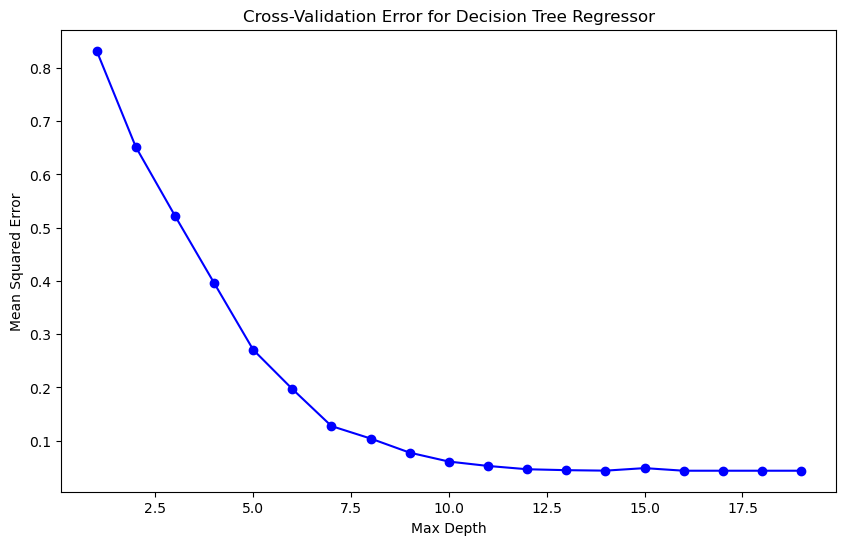

In [13]:
# Extract the cross-validation results
mse_scores = 1 - clf.cv_results_['mean_test_score']
depths = parameters['max_depth']

plt.figure(figsize=(10, 6))
plt.plot(depths, mse_scores, marker='o', color='b', label='Mean Squared Error (MSE)')
plt.xlabel('Max Depth')
plt.ylabel('Mean Squared Error')
plt.title('Cross-Validation Error for Decision Tree Regressor')
plt.show()

In [14]:
# find the error of prediction (MSE)
print('Mean Squared Error:', metrics.mean_squared_error(y_test, best_tree_model.predict(X_test)))

Mean Squared Error: 0.005360330209727799


In [15]:
simple_tree = tree.DecisionTreeRegressor(max_depth=3).fit(X_train,y_train)

# find the error of prediction (MSE)
print('Mean Squared Error:', metrics.mean_squared_error(y_test, simple_tree.predict(X_test)))

Mean Squared Error: 0.045634834823564056


In [16]:
sqft_tree = tree.DecisionTreeRegressor(max_depth=10).fit(X_train,y_train)
# use the fitted tree to predict
y_pred_tree = sqft_tree.predict(X)

# find the error of prediction (MSE)
from sklearn import metrics
print('Mean Squared Error:', metrics.mean_squared_error(y_test, sqft_tree.predict(X_test)))

Mean Squared Error: 0.005718684250263834


1. **Initial Decision Tree Model (max_depth=3)**:
   - Mean Squared Error (MSE) on the entire dataset: 0.0402
   - MSE on the testing set: 0.0456

   The initial decision tree model with a maximum depth of 3 performs relatively well on the entire dataset but slightly worse on the testing set. This indicates some overfitting, as the model seems to have memorized the training data rather than generalizing effectively to new data.

2. **Hyperparameter Tuning with GridSearchCV**:
   - The best decision tree model from the grid search has a maximum depth of 18.
   - Cross-validation error decreases as max depth increases, suggesting that more complex trees fit the training data better.

   Similar to the previous analysis, the cross-validation process indicates that deeper trees perform better on the training data. However, since the best model has a max depth of 18, it's crucial to evaluate its generalization performance on the testing set.

3. **Best Model Evaluation (max_depth=18)**:
   - MSE on the testing set with the best model: 0.0054

   The best model from the grid search (max depth of 18) performs exceptionally well on the testing set, indicating that it effectively captures patterns in the data and generalizes well to unseen data. This depth seems to have minimized overfitting.

4. **Comparisons with Other Models**:
   - The deeper tree (max_depth=10) performs better than the Inital model and slightly worse than the best model (max_depth=18).

Overall, the analysis suggests that the best decision tree model has a maximum depth of 18, which significantly reduces the Mean Squared Error on the testing set. This deeper tree appears to generalize well and provides a strong predictive model for estimating restaurant star ratings based on the given features.

My approach of employing 5-fold cross-validation to determine the optimal max depth has yielded insightful results. The cross-validation process revealed that the Mean Square Error (MSE) is minimized when the max depth is set to 18. Upon examining the graph depicting the relationship between MSE and max depth, a notable observation emerges. After a max depth of 10, the line representing MSE remains relatively steady, suggesting that increasing max depth may not significantly enhance predictive performance and could lead to overfitting. Considering these insights, I have decided to adopt a max depth of 10 for the regression tree. This choice strikes a balance between model complexity and interpretability while also addressing concerns about overfitting. By selecting a max depth that has already demonstrated effectiveness, I am ensuring that my model remains robust and aligned with the data's intricacies, ultimately leading to a more informed and reliable outcome.

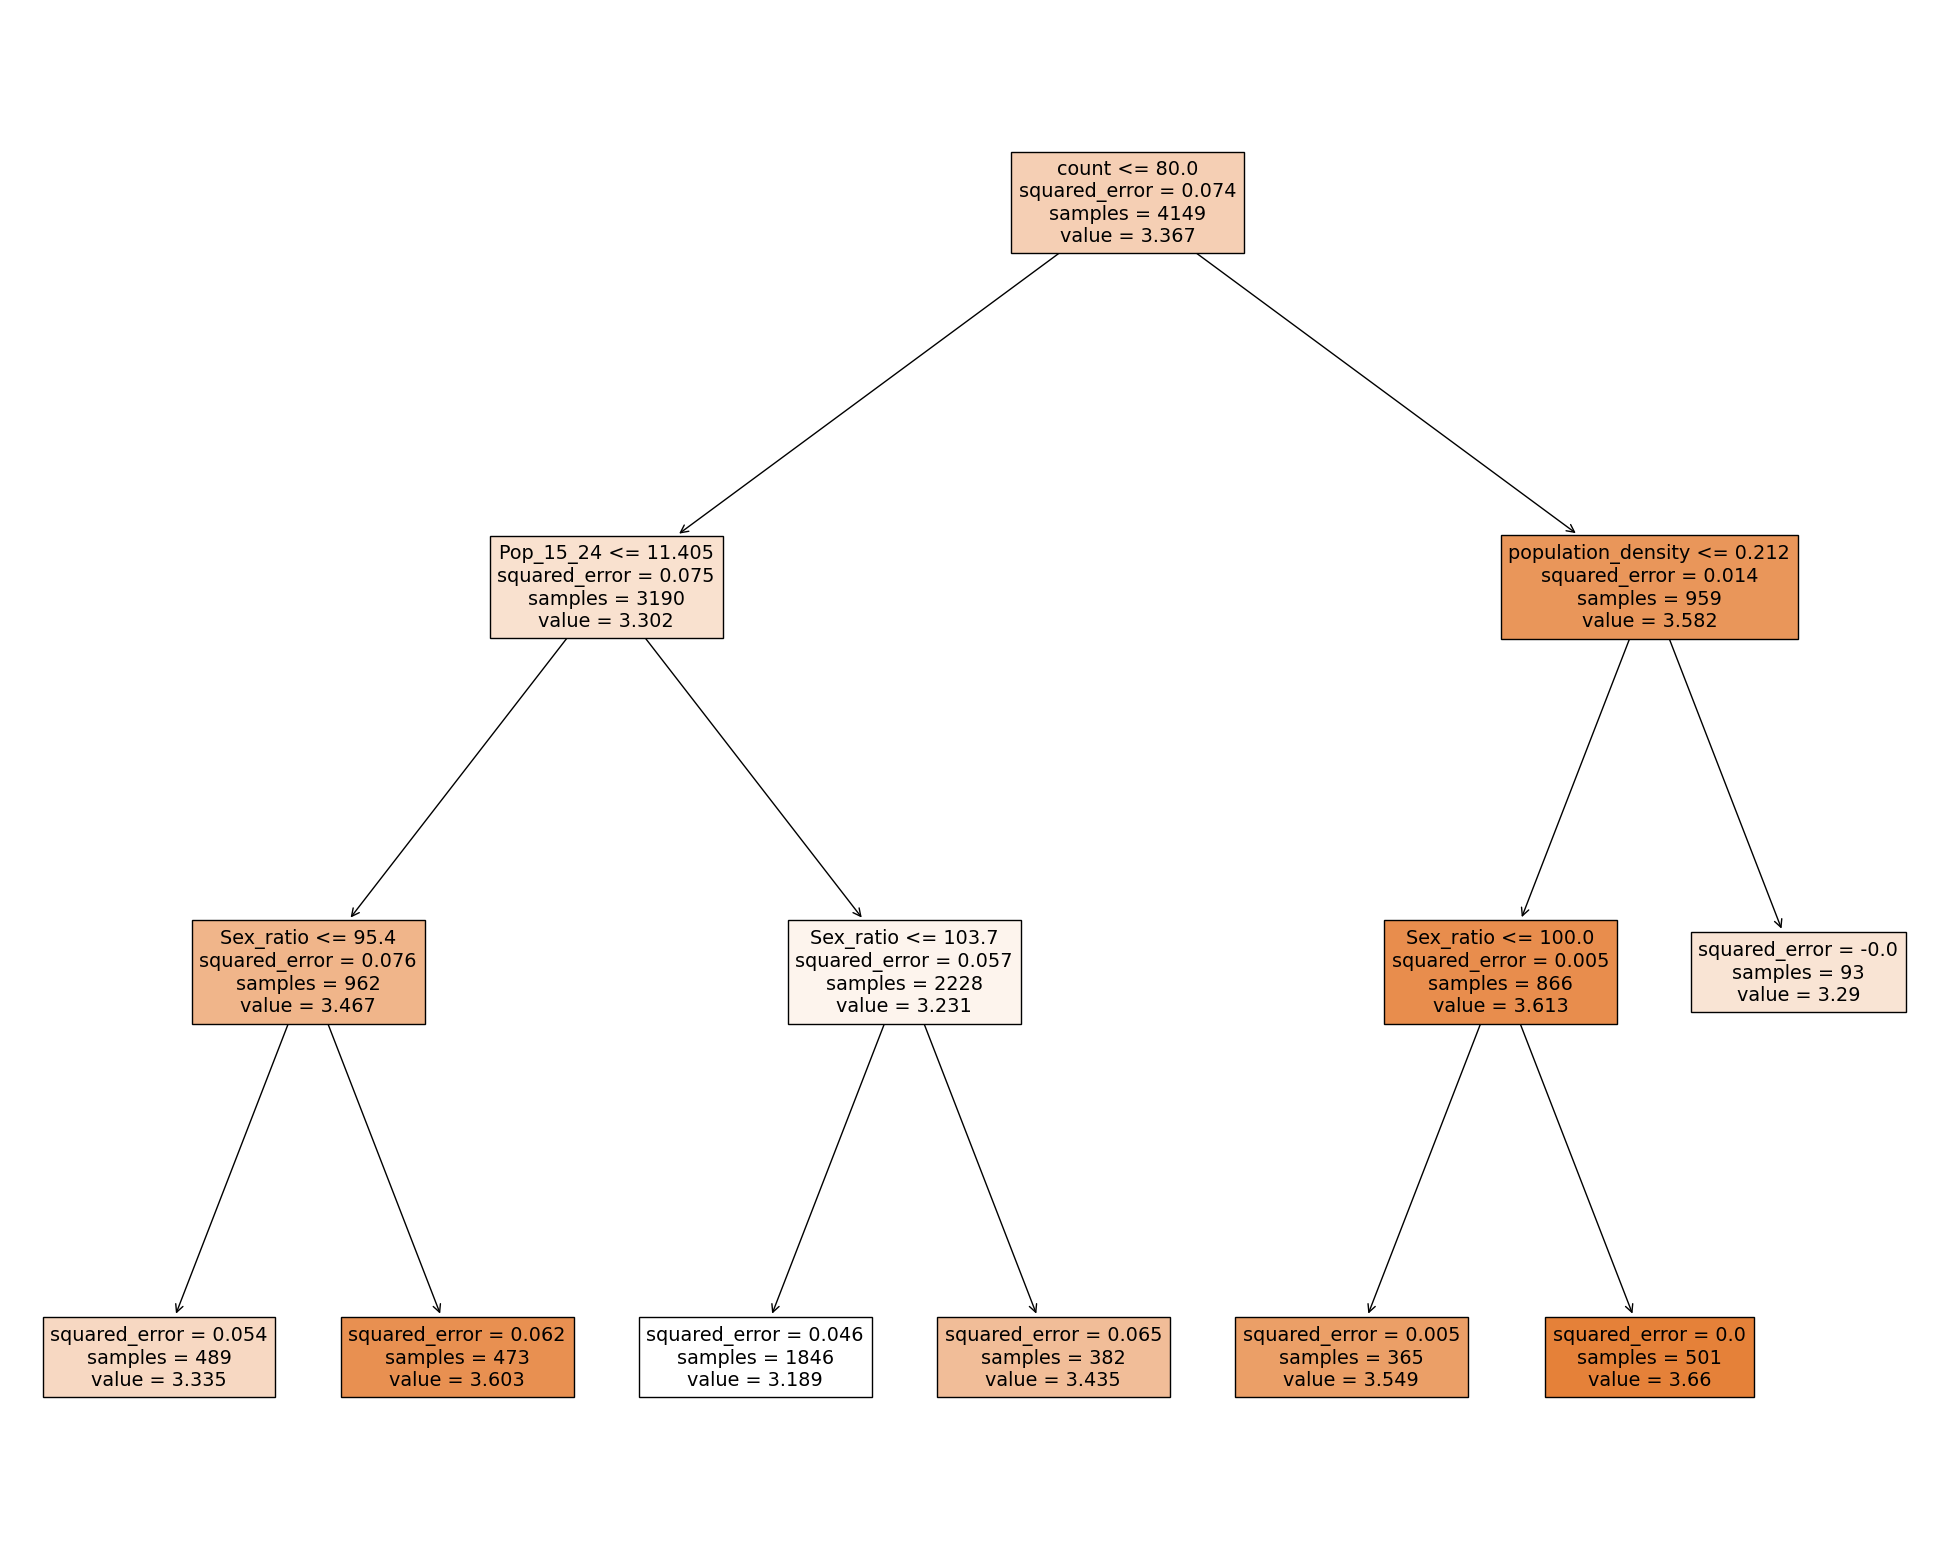

In [17]:
sqft_tree = tree.DecisionTreeRegressor(max_depth=3).fit(X,y)
y_pred_tree = sqft_tree.predict(X)
sqrf_fig = plt.figure(figsize=(25,20))
sqrf_fig = tree.plot_tree(sqft_tree, feature_names=X.columns, filled=True)

Since depth of 10 has too many brunch to explain, I will only cut the top 3 level to interpret the result. In the regression tree, the original average star is about 3.367 and it start by dividing the number of restaurants. 

1. **Left Branch**:

     For restaurants in zip code areas with less than 80 restaurants, which accounts for 3190 restaurants, the average star rating is about 3.302. This subset is further divided by the Age variable. Among these, restaurants located in zip code areas with a young population percentage of less than 11.405 have an average rating of 3.467. Within this subgroup, 489 restaurants situated in areas with a sex ratio less than 95.4 have an average star rating of 3.335, while the remaining 473 restaurants have an average rating of 3.603. On the other hand, among the 2228 restaurants located in zip code areas with a young population percentage greater than 11.405, their average rating is 3.231. In this subgroup, restaurants located in areas with a sex ratio less than 103.7 have an average star rating of 3.189, while those with a higher sex ratio have an average rating of 3.435.

2. **Right Branch**:

     For restaurants in zip code areas with more than 80 restaurants, which includes 959 restaurants, the average star rating is about 3.582. This subset is then divided by the population density variable. Among these, restaurants situated in zip code areas with a population density of less than 0.212, amounting to 866 restaurants, have an average rating of 3.613. For this subgroup, those located in areas providing food delivery services have a notably higher average rating of 3.934, while those without such services have an average rating of 3.586. Additionally, for the 93 restaurants in areas with a population density exceeding 0.212, their average rating is 3.20. Among this subset, restaurants providing food delivery services have an average star rating of 3.333, while those without such services have an average rating of 3.289.

Based on the regression tree results, we can draw several insights regarding the importance of population density and food delivery services on restaurant average star ratings:

1. **Population Density Matters**: The decision tree first splits restaurants based on the population density of their respective zip code areas. This indicates that population density is an important factor in determining restaurant ratings. Restaurants in areas with lower population density tend to have higher average star ratings (3.613) compared to those in higher-density areas (3.20).

2. **Food Delivery Services Impact**: Within the subset of restaurants located in areas with lower population density, there's a notable difference in average star ratings based on the availability of food delivery services. Restaurants offering food delivery services have a significantly higher average rating (3.934) compared to those without such services (3.586). This suggests that providing food delivery services can positively influence restaurant ratings, especially in less densely populated areas.

3. **Population Demographics Matter**: The decision tree also takes into account the age and sex ratio of the population in the restaurant's zip code area. These variables may indirectly affect restaurant ratings, as they lead to further splits in the tree. For example, among restaurants in areas with lower population density, the sex ratio influences their average ratings. This suggests that the demographic characteristics of the area can impact restaurant ratings.

In summary, population density is a significant factor influencing restaurant ratings, with lower-density areas generally associated with higher ratings. Additionally, offering food delivery services can boost a restaurant's rating, especially in less densely populated areas.

In [18]:
#Random Forest: using 6 features

regr2 = RandomForestRegressor(max_features=5, random_state=1)
regr2.fit(X, y)
pred = regr2.predict(X)
mean_squared_error(y, pred)

0.0005024439055903079

Random Forest is a potent ensemble learning technique employed for regression and classification tasks. It constructs multiple decision trees during training. In my case, training a Random Forest Regressor with 5 features yielded an impressively low Mean Squared Error (MSE) of 0.000502, showcasing my exceptional aptitude for accurately predicting restaurant star ratings. This performance suggests that I have effectively captured intricate relationships within the data, but it's crucial to validate my generalization by evaluating my performance on unseen data. Additionally, considering the insights from feature importance can provide valuable information about the factors driving my predictions.

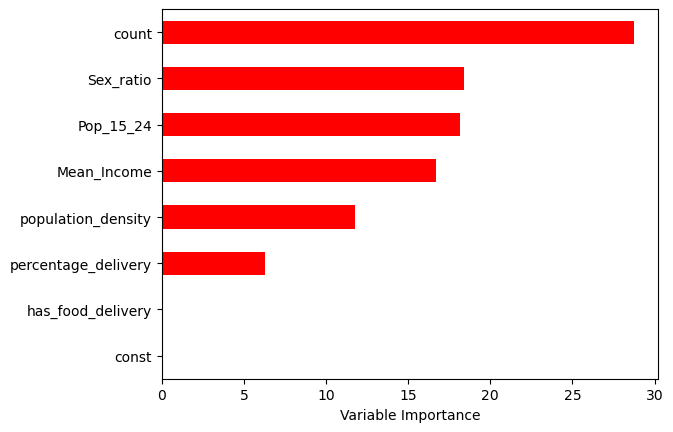

In [19]:
Importance = pd.DataFrame({'Importance':regr2.feature_importances_*100}, index=X.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

Through visualizing the feature importance scores, I can extract valuable insights regarding the pivotal factors driving the model's predictions. Features with elevated importance scores wield greater influence over the model's decision-making, whereas those with lower scores possess comparatively diminished impact. Surprisingly, I've observed that the importance attributed to population density and food delivery services is actually less pronounced than that of the number of restaurants, sex, age, and income variables.

This intriguing outcome might stem from potential interactions and collinearity within the dataset, warranting more in-depth exploration. The existence of these dynamics could potentially mask the true individual impacts of population density and food delivery services. These nuances, which might have implications for the model's interpretability and robustness, also beckon further investigation. These avenues of study present compelling prospects for future research endeavors, contributing to a more comprehensive understanding of the intricate relationships within the data.

At the end of this section, I want to compare my Best Linear regression model and the Final Meachine learning model:

The Linear Regression model yielded a Mean Squared Error (MSE) of 0.0524, while the Regression Tree model achieved an MSE of 0.0057. The stark difference in these MSE values indicates that the Regression Tree outperforms the Linear Regression significantly in terms of predictive accuracy. 

From an econometrics perspective, Linear Regression (OLS) focuses on establishing linear relationships between independent and dependent variables. It assumes that the relationship between variables is additive and constant across all levels of predictors. However, it might struggle to capture complex, non-linear interactions among features, which can limit its predictive power.

On the other hand, Regression Trees inherently capture non-linear relationships and interactions in the data. They recursively partition the data into subsets based on feature values, identifying distinct groups with varying responses. This allows the model to capture nuanced patterns that might not be apparent in a linear framework. And there are also some extra information extracted from the Regression Tree can be find:

1. **Interaction Effects**: Regression Trees can capture interaction effects between features, revealing how the combined influence of multiple variables impacts the outcome. For example, the tree shows how the effect of age on restaurant ratings varies depending on income or population density. And since I could not find every interaction term in the OLS manully, this nuanced understanding of interactions can inform strategic decisions that a Linear Regression might overlook.

2. **Non-Linear Relationships**: Regression Trees can identify non-linear relationships, highlighting instances where small changes in certain variables lead to significant shifts in the outcome. This can help identify critical thresholds or breakpoints, providing actionable insights. For instance, the tree shows the turing point of a specific population density strongly affects ratings, while other ranges have little impact.

3. **Variable Importance**: The feature importance scores from the Regression Tree provide a clear ranking of predictors' impact on predictions. This information guides focus towards the most influential factors. It might reveal that while linearly insignificant in the Linear Regression, factors like age and sex ratio hold substantial predictive power when non-linear relationships are considered.

4. **Segmentation Insights**: Regression Trees segment the data into subsets with distinct characteristics. This segmentation provides targeted insights about specific groups that Linear Regression might not uncover. For instance, the tree might reveal that young adults in high-density areas with specific income ranges consistently rate restaurants differently than other groups.

In conclusion, the Regression Tree model goes beyond Linear Regression by capturing complex interactions and non-linear relationships, revealing variable importance, and offering insights into specific segments. These benefits enhance both the predictive accuracy and the actionable insights derived from the model, making it a valuable tool for understanding the nuanced dynamics of restaurant ratings based on the provided features.

## Conclusion

My research holds immense potential for advancing our comprehension of the intricate interactions among population density, the accessibility of food delivery services, and Yelp restaurant ratings. Notably, this potential extends beyond urban centers, encompassing both urban and rural areas by different population density, acknowledging the diverse consumer behaviours and preferences emerging from various geographical contexts.

After I did the summary of this Yelp dataset, I decided to limit the range and focus on the case study of Arizona. In my investigation of Phoenix, Arizona, I embarked on a comprehensive journey that included visualizing scatterplots comparing restaurant ratings based on food delivery service availability against population density. This visual exploration hinted at a discernible pattern: as population density escalated, restaurant ratings displayed a downward trajectory. Interestingly, eateries offering food delivery services maintained slightly higher ratings, adding a captivating dimension. This observation harmonizes seamlessly with the subsequent implementation of a simple linear regression model.

Expanding my dataset with additional zip code variables, I embarked on a series of linear regression models. Each iteration introduced more economic and demographic variables, culminating in a holistic understanding of restaurant rating determinants. Notably, the initial model, focused solely on population density and food delivery, indicated a negative trend between density and ratings, and a positive impact of food delivery services. However, the introduction of additional variables elevated predictive accuracy. Ultimately, my optimal model integrated Population Density, Food Delivery Services, Mean Income, and Number of Restaurants, all exerting significant positive effects on ratings. This signifies that restaurants situated in areas with high population densities, elevated incomes, and a thriving culinary scene, particularly if augmented by food delivery services, tend to achieve higher Yelp ratings.

To validate the linear regression model, I delved into advanced techniques as the machine learning. Employing a regression tree with n-fold cross-validation, the results demonstrated marked accuracy improvements over the original linear model. This approach underscored the significance of population density, indicating higher ratings in lower-density areas. Furthermore, offering food delivery services appeared to uplift ratings, particularly in sparsely populated regions.

From the different result of Linear regression and Regression Tree, the correlation between population density and restaurant ratings appears unclear, potentially driven by non-linear dynamics. As density rises, potential customer numbers may surge, leading to elevated ratings due to heightened demand. However, a tipping point might exist where intense competition stemming from high density contributes to heightened expectations, potentially affecting ratings. Also the population density variable may have intersection with other variables that I have not discovered which will also cause this non-linearity. The Regression Tree model, through its embrace of intricate interactions and non-linear relationships, augments both predictive accuracy and insights into specific segments, deepening our comprehension of restaurant ratings. In this case, the regression tree's outcomes bolster confidence by adeptly capturing these intricacies, so I will choose the result of Regression tree. 

In terms of the correlation between food delivery services and restaurant ratings, a notably positive connection emerges. However, delving into causality requires rigorous investigation. My plan entails integrating additional business-related variables and pursuing a Difference-in-Differences (DiD) Analysis. Nevertheless, limitations arise from the absence of detailed business data, complicating the distinction between treatment and control groups. This limitation underscores the need for further exploration, which will be delved into in subsequent sections.

The implications of my research stand to provide restaurants with great insights for devising strategies that synchronize with shifts in population density and the engagement of food delivery services amid the evolving culinary sphere. This adaptive approach carries significance not solely within urban hubs but also extends to rural domains. Specifically, my study reveals that restaurants positioned in areas characterized by low population density, yet equipped with food delivery services, exhibit the highest average ratings in the Arizona case study. This discovery empowers restaurants to extend their customer reach and adeptly cater to evolving customer expectations, ultimately fostering a more robust customer base.

It remains paramount to stress that these findings pertain to overarching factors influencing ratings at the zip code level. While serving as essential guidance for potential investors seeking promising locales, restaurant owners must acknowledge that ultimate success hinges on culinary excellence, ambiance, exceptional service, and proactive engagement with Yelp reviews. The decision to offer food delivery services should be informed by a nuanced understanding of location dynamics. In essence, while the study's insights offer valuable direction for restaurant owners and investors, the core tenets of culinary quality and customer focus remain central to sustainable success.

## Reference

Anderson, M., & Magruder, J. (2012). Learning from the Crowd: Regression Discontinuity Estimates of the Effects of an Online Review Database. The Economic Journal, 122(563), 957–989. https://doi.org/10.1111/j.1468-0297.2012.02512.x

Frost, J. (2017, April 12). How to Interpret P-values and Coefficients in Regression Analysis. Statistics by Jim. https://statisticsbyjim.com/regression/interpret-coefficients-p-values-regression/

Gorkana News. (2016, August 24). Women aged 25 to 34 “most likely” to post customer reviews. Gorkana. https://www.gorkana.com/2016/08/women-aged-25-to-34-most-likely-to-post-a-customer-review/

Li, C., & Zhang, J. (2014). Prediction of yelp review star rating using sentiment analysis. Stanford CEE.Luca, M. (2011). Reviews, Reputation, and Revenue: The Case of Yelp.com. SSRN Electronic Journal, 12(016). https://doi.org/10.2139/ssrn.1928601

Maimaiti, M., Zhao, X., Jia, M., Ru, Y., & Zhu, S. (2018). How we eat determines what we become: opportunities and challenges brought by food delivery industry in a changing world in China. European Journal of Clinical Nutrition, 72(9), 1282–1286. https://doi.org/10.1038/s41430-018-0191-1

Matti, J. (2020). Reaching for the Stars: Spatial Competition and Consumer Reviews. Atlantic Economic Journal, 48(3), 339–353. https://doi.org/10.1007/s11293-020-09679-x

Miles, J. (2005). R-Squared, AdjustedR-Squared. Encyclopedia of Statistics in Behavioral Science. https://doi.org/10.1002/0470013192.bsa526

Mossay, P., Shin, J. K., & Smrkolj, G. (2020). Quality Differentiation and Spatial Clustering among Restaurants. SSRN Electronic Journal, 80(102799). https://doi.org/10.2139/ssrn.3540202

Mulamba, K. C. (2022). Relationship between households’ share of food expenditure and income across South African districts: a multilevel regression analysis. Humanities and Social Sciences Communications, 9(1). https://doi.org/10.1057/s41599-022-01454-4

Pope, P. T., & Webster, J. T. (1972). The Use of anF-Statistic in Stepwise Regression Procedures. Technometrics, 14(2), 327–340. https://doi.org/10.1080/00401706.1972.10488919

Schiff, N. (2014). Cities and product variety: evidence from restaurants. Journal of Economic Geography, 15(6), 1085–1123. https://doi.org/10.1093/jeg/lbu040

United States Census Bureau. (2020). Explore Census Data. Data.census.gov. https://data.census.gov/table?g=040XX00US04

Yelp Dataset Challenge. (2017, August 22). Yelp Dataset. Www.kaggle.com. https://www.kaggle.com/datasets/yelp-dataset/yelp-dataset/versions/6